# DeepInsight Run for TCGA data

This example runs DeepInsight to using the TCGA cancer data, the most complex dataset in the DeepInsight paper. Will also save data that can be imported to DeepMapper.

In [13]:
from pyDeepInsight import ImageTransformer
from pyDeepInsight.utils import Norm2Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

import warnings; 
warnings.simplefilter('ignore')

Load example TCGA data and split into training and testing sets

In [2]:
expr_file = r"examples/data/curatedTCGAData_RNASeq2GeneNorm-20160128.txt.gz"
expr = pd.read_csv(expr_file, sep="\t")
y = expr['cancer'].values
X = expr.iloc[:, 2:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

In [3]:
expr

,patient_id,cancer,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-3C-AAAU,BRCA,197.0897,0.0000,0.0000,102.9634,1.3786,5798.3746,68.2424,8.6165,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,TCGA-3C-AALI,BRCA,237.3844,0.0000,0.0000,70.8646,4.3502,7571.9793,157.6944,0.5438,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,TCGA-3C-AALJ,BRCA,423.2366,0.9066,0.0000,161.2602,0.0000,8840.3989,573.8894,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
3,TCGA-3C-AALK,BRCA,191.0178,0.0000,0.0000,62.5072,1.6549,10960.2193,506.4129,0.0000,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
4,TCGA-4H-AAAK,BRCA,268.8809,0.4255,3.8298,154.3702,3.4043,9585.4426,342.1277,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,TCGA-MK-A4N6,THCA,70.8471,0.0000,0.7666,96.7574,0.0000,7901.1000,547.7194,0.0000,...,36.4124,371.7900,1043.3116,62.8593,2811.4220,4632.4262,1179.7624,718.6662,411.6520,0.0
4175,TCGA-MK-A4N7,THCA,46.7046,0.0000,1018.9109,132.6771,0.3038,8726.9416,174.3753,0.9114,...,60.7580,411.0276,1148.0216,15.4933,1607.9593,2857.7504,1158.3504,938.1028,424.3943,0.0
4176,TCGA-MK-A4N9,THCA,225.6864,3.0008,347.2297,123.3308,0.0000,9310.8606,196.7635,0.4287,...,52.2988,311.6493,1289.8939,6.4302,1359.3398,3845.6757,1291.6086,819.6335,316.7935,0.0
4177,TCGA-MK-A84Z,THCA,204.0150,0.0000,3.6312,93.7777,1.0375,23818.3323,482.9464,1.0375,...,59.1363,298.7939,1066.5283,112.0477,1307.7422,1860.1997,1101.8026,795.2276,333.5495,0.0


In [4]:
feature_names=list(expr.columns)[2:]

In [5]:
X_train
X_test.shape

(836, 19319)

In [6]:
len(feature_names)

19319

In [7]:
data_names=np.unique(y)
data_names

array(['BRCA', 'HNSC', 'KIRC', 'LGG', 'LUAD', 'LUSC', 'THCA'],
      dtype=object)

Normalize data using LogScaler and encode classes

In [8]:
%time
ln = Norm2Scaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [9]:
X_train_norm

array([[0.31815922, 0.        , 0.40093912, ..., 0.41588136, 0.1708277 ,
        0.        ],
       [0.33277794, 0.        , 0.0899428 , ..., 0.42394137, 0.40140181,
        0.        ],
       [0.26804689, 0.        , 0.0159396 , ..., 0.440015  , 0.19241375,
        0.0159396 ],
       ...,
       [0.27781517, 0.        , 0.34794234, ..., 0.42540066, 0.30340412,
        0.        ],
       [0.35455472, 0.        , 0.        , ..., 0.46487672, 0.2157689 ,
        0.        ],
       [0.29653939, 0.        , 0.        , ..., 0.44313818, 0.19161955,
        0.02999184]])

In [10]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [18]:
import pickle
data_file_name='tcgadata.pickle'
data={'X': X, 'y':y, 'feature_names':feature_names, 'class_names':data_names, 'obs_names':expr['patient_id'].tolist() }
with open(data_file_name, 'wb') as data_file:
  pickle.dump(data, data_file)

Create t-SNE object

In [11]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    init='random',
    learning_rate='auto',
    n_jobs=-1
)

Initialize image transformer.

In [15]:
pixel_size = (227,227)
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

Train image transformer on training data and transform training 
and testing sets. Values should be between 0 and 1.

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


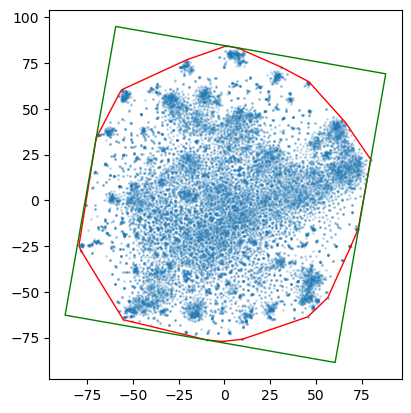

In [16]:
%time
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

In [17]:
X_train_img[0][0][129]

array([0., 0., 0.])

The feature density matrix can be extracted from the trained transformer in order to view overall feature overlap.

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

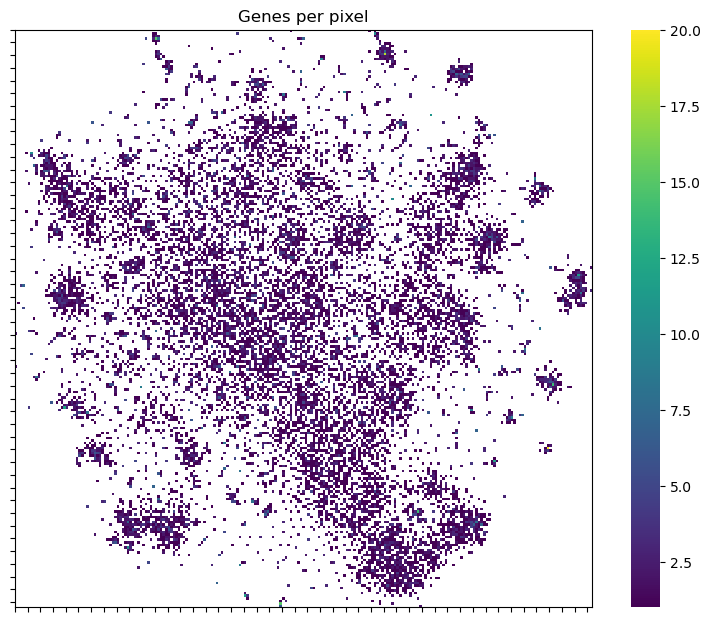

In [19]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

The following are showing plots for the image matrices first four samples 
of the training set. 

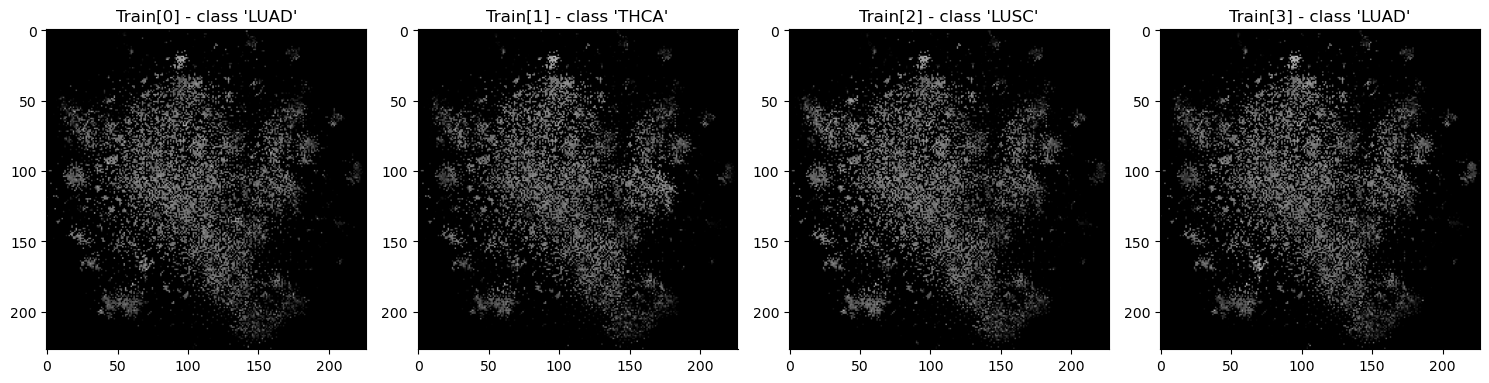

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

Transforming the testing data is done the same as transforming the 
training data.

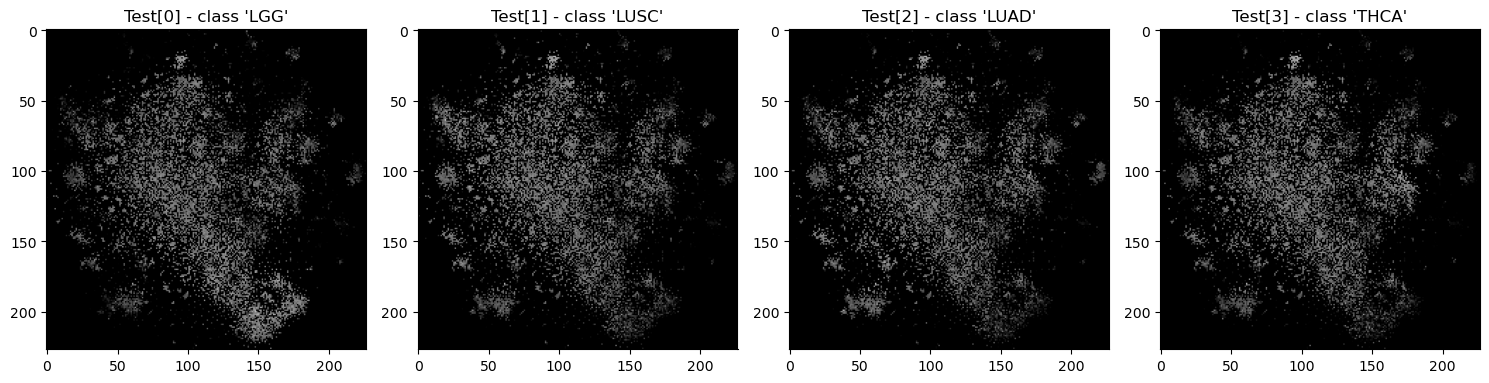

In [21]:
#X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(0,4):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text(f"Test[{i}] - class '{y_test[i]}'")
plt.tight_layout()

## ResNet

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

import warnings; 
warnings.simplefilter('ignore')

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [24]:
model = torchvision.models.squeezenet1_1(weights='DEFAULT')
model.classifier.append(nn.Flatten())
_ = model.classifier.append(nn.Linear(1000, num_classes))

In [25]:
model = torchvision.models.resnet18(pretrained=False)
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, num_classes)
for param in model.fc.parameters():
    param.requires_grad = True

Transform numpy image format to PyTorch tensor. Using an untrained network,
so normalization as specificed in SqueezeNet documentation is not 
required.


In [26]:
preprocess = transforms.Compose([
        transforms.ToTensor(),
#        transforms.Resize(224),

        transforms.Lambda(lambda x: x.expand(3, -1, -1))
])

In [27]:
X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float()
y_train_tensor = torch.from_numpy(le.fit_transform(y_train))

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float()
y_test_tensor = torch.from_numpy(le.transform(y_test))

Generate pyTorch datasets and dataloaders for training and testing sets.

In [28]:
batch_size = 200

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

Specify loss function and optimization algorithm

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-04,
    #momentum=0.8,
    weight_decay=1e-05
)

Train SqueezeNet for 120 epochs

In [30]:
%%time
model.train()
model.to(device)
for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

[0] loss: 0.782
[20] loss: 0.001
[40] loss: 0.000
[60] loss: 0.000
[80] loss: 0.000
[99] loss: 0.000
CPU times: user 28min 26s, sys: 2min 25s, total: 30min 52s
Wall time: 5min 12s


Calculate accuracy of prediction

In [31]:
model.to('cpu')
model = model.eval()

In [32]:
with torch.no_grad():
    y_hat = model(X_train_tensor)
train_predicted = torch.max(y_hat, 1)[1]

In [33]:
with torch.no_grad():
    y_hat = model(X_test_tensor)
test_predicted = torch.max(y_hat, 1)[1]

In [34]:
print(f"The train accuracy was {accuracy_score(train_predicted, y_train_tensor):.3f}")
print(f"The test accuracy was {accuracy_score(test_predicted, y_test_tensor):.3f}")

The train accuracy was 1.000
The test accuracy was 0.983


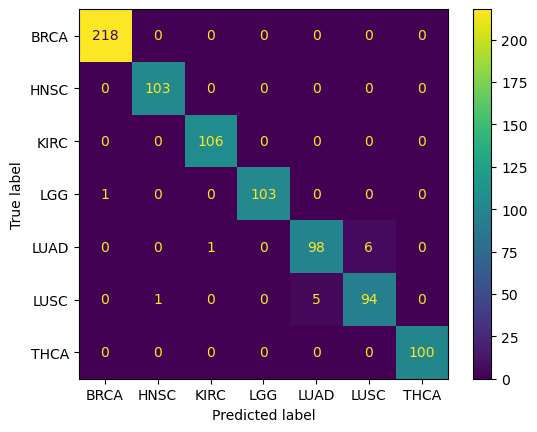

In [35]:
_ = ConfusionMatrixDisplay.from_predictions(test_predicted, y_test_tensor, display_labels=le.classes_)